##  **PART-1: ANALYSIS OF INTERNATIONAL SATELLITE LAUNCHES BY ISRO**

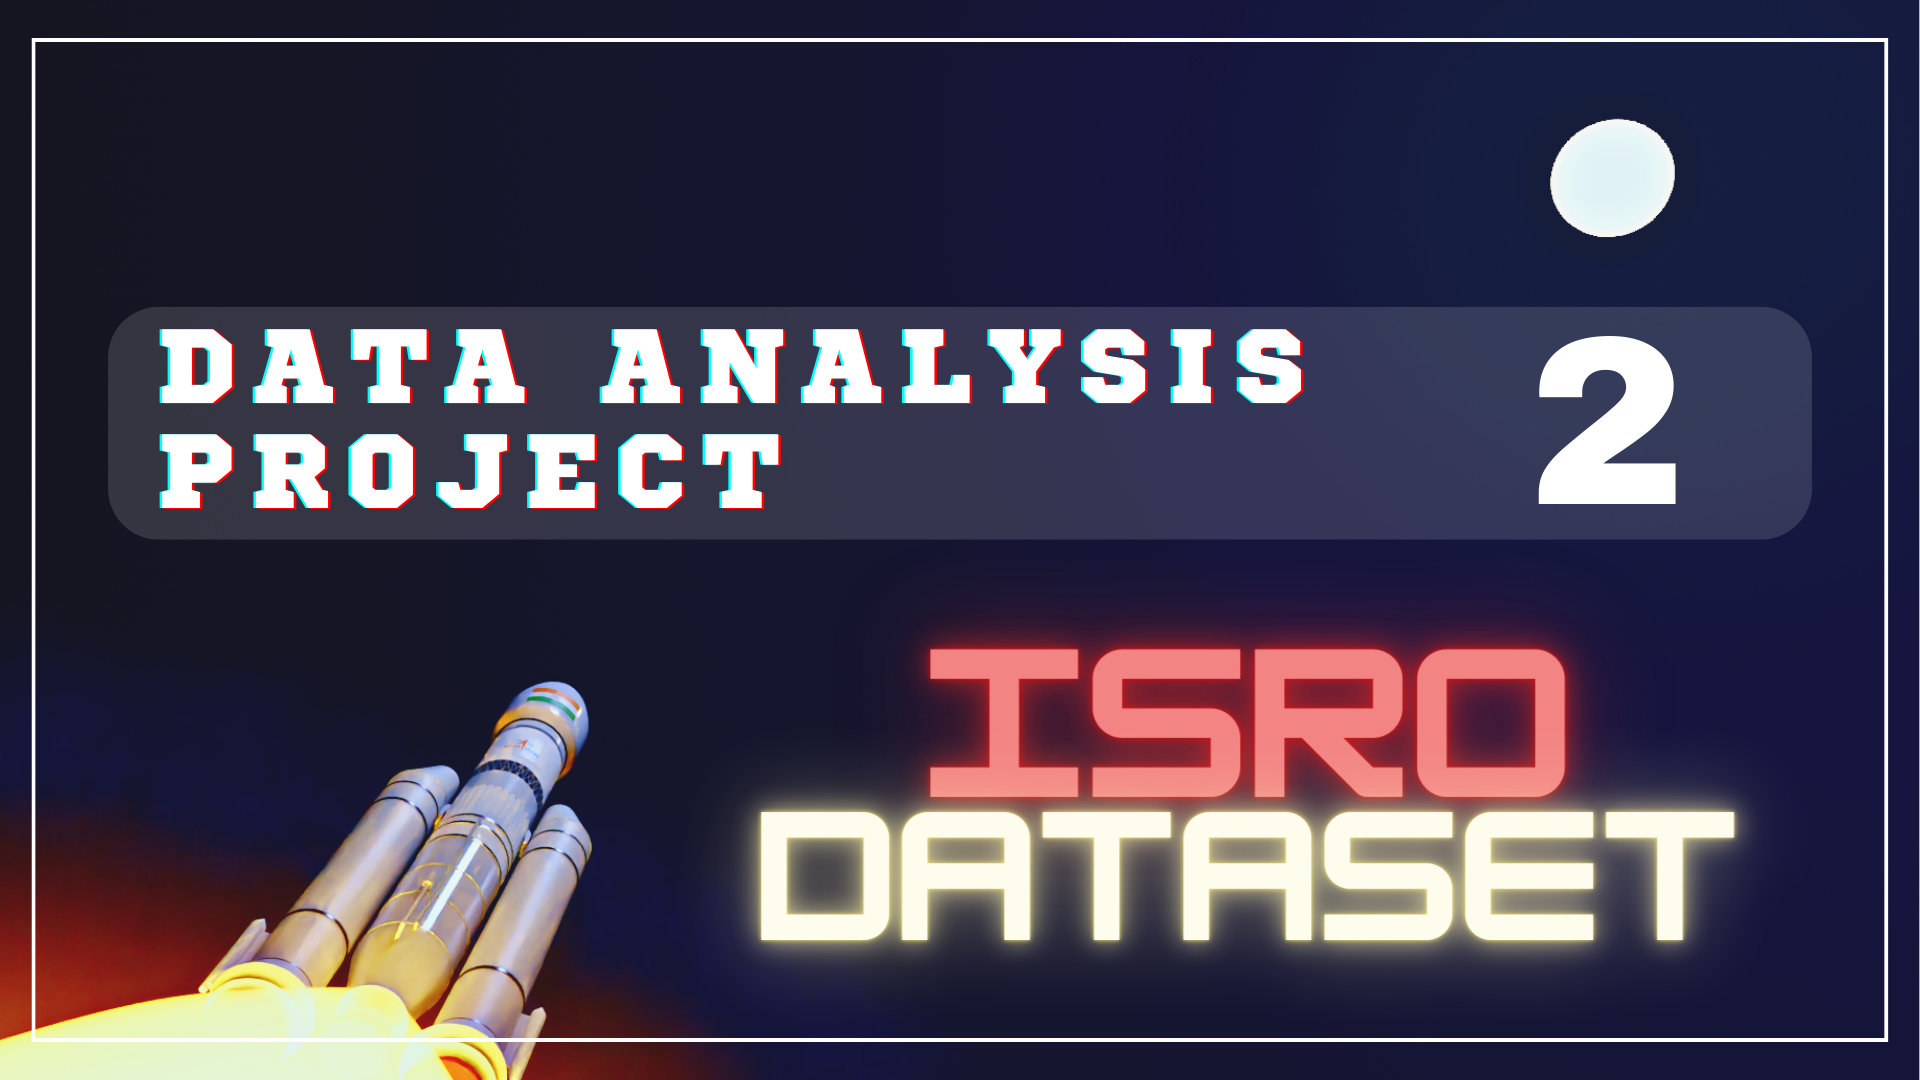

In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# <center> Analysis of international customer Satellite launches by ISRO <center>

In [460]:
i1 = pd.read_csv("D:/DOWNLOADS/381_foreign_satellites.csv")
sns.set_style("darkgrid")
i1.head(2)

,Date,Sat Name,Country,Tot_Sats,Mass_Kg,Launch Vehicle,Launch_No
0,23-10-22,Oneweb Gen-1,UK,36,5400.0,LVM3,M2
1,10-07-15,"DMC3-1, 3-2, 3-3",UK,3,1341.0,PSLV,C28


### <center> Top 10 International customers in terms of weight <center>

Country
UK           7789.75
USA          1936.36
FRANCE       1456.95
SINGAPORE     769.28
CANADA        435.02
ITALY         403.96
ALGERIA       343.00
ISRAEL        321.81
GERMANY       308.15
INDONESIA     252.00
Name: Mass_Kg, dtype: float64


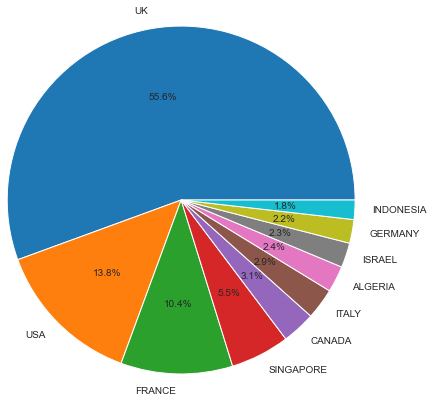

In [461]:
Top_10_Country = i1.groupby(["Country"])["Mass_Kg"].sum().sort_values(ascending=False).nlargest(10)
print(Top_10_Country)
Top_10_Country.plot.pie(radius = 2,autopct='%.1f%%')
plt.ylabel(" ");


### <center> Biggest international customers in terms of number of satellite launched by ISRO <center>

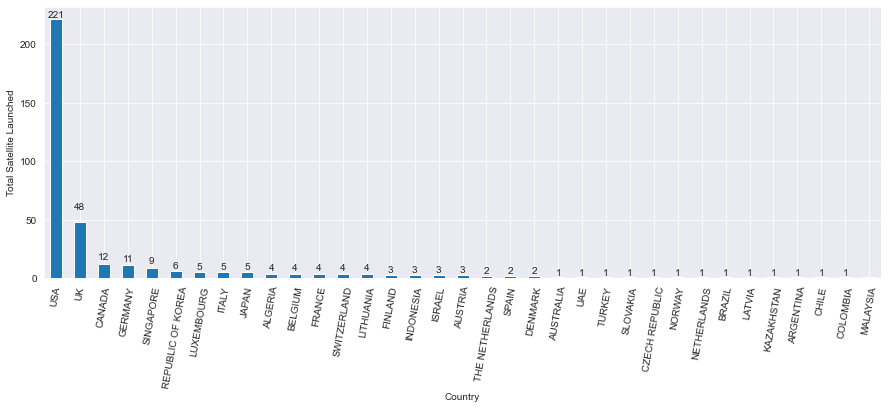

In [496]:
#number of sats by each country
plt.figure(figsize=(15,5))
ta = i1.groupby("Country")["Tot_Sats"].sum().sort_values(ascending=False)
ta.plot(kind="bar")
plt.ylabel("Total Satellite Launched");

for i in range (0,34):
    if ta[i]<50:
        plt.text(i,ta[i]+0.2*ta[i],ta[i],ha="center",va="bottom")
    elif ta[i]>=200:
        plt.text(i,ta[i],ta[i],ha="center",va="bottom")
    else:
        plt.text(i,ta[i]+10,ta[i],ha="center",va="bottom")
        
plt.xticks(rotation=80)  
plt.show()



In [463]:
#number of launches = no.of unique dates || two different vehicle are not sent on the same day
i1['year'] = pd.DatetimeIndex(i1['Date']).year
i1['month'] = pd.DatetimeIndex(i1['Date']).month
i1['day'] = pd.DatetimeIndex(i1['Date']).day
i1["Date"].nunique()


30

### <center>MONTH WITH MOST LAUNCHES AND YEAR WISE INTERNATIONAL SATELLITE LAUNCHES<center>

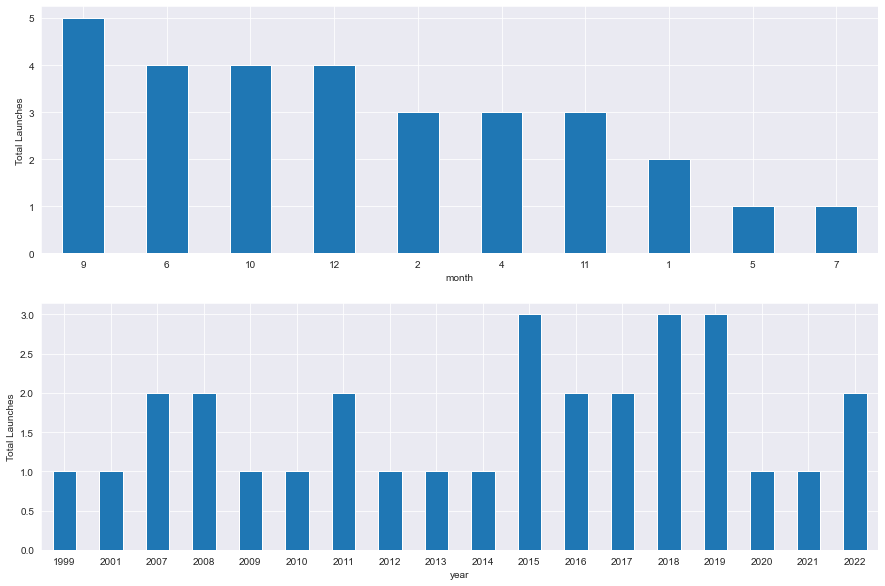

In [494]:
#Month with most launches
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
i1.groupby("month")["Date"].nunique().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Total Launches");

#Year wise internation launches
plt.subplot(2,1,2)
i1.groupby("year")["Date"].nunique().plot(kind="bar")
plt.xticks(rotation=0);
plt.ylabel("Total Launches");


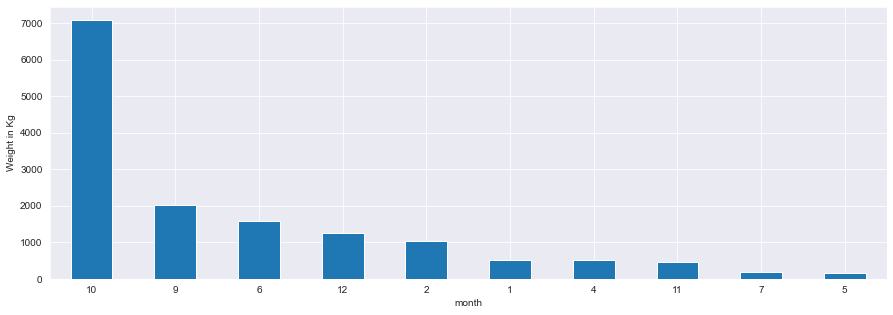

In [491]:
#Month with the heaviest launches from 1999-2020
plt.figure(figsize=(15,5))
i1.groupby("month")["Mass_Kg"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=0);
plt.ylabel("Weight in Kg");

### <center> Year wise internation launches in terms of weight <center>

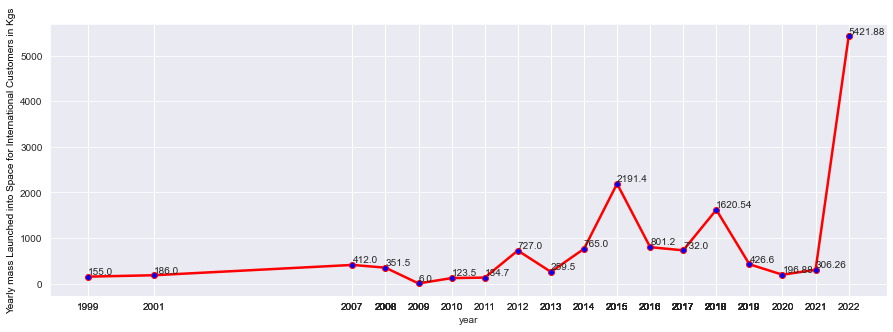

In [489]:
plt.figure(figsize=(15,5))
tz=i1.groupby("year")["Mass_Kg"].sum()
tz.plot(kind="line",marker="o",mfc="blue",lw=2.5,c="red");
for i in range(1999,2023):
    if i>=2009:
        plt.text(i,tz[i]+50,tz[i])
        
    elif (i==1999 or i==2001 or i==2007 or i==2008):
        plt.text(i,tz[i]+50,tz[i])

plt.xticks(i1["year"]);
plt.ylabel("Yearly mass Launched into Space for International Customers in Kgs", c="black");

### <center> Launch vehicle wise weight Carried <center>

                Mass_Kg  year
Launch Vehicle               
LVM3            5400.00     1
PSLV            9416.96   141


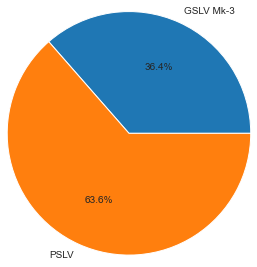

In [467]:
t21=i1.groupby(["Launch Vehicle"]).agg({'Mass_Kg':'sum','year':'count'})
print(t21)
label = ["GSLV Mk-3","PSLV"]
plt.pie(t21["Mass_Kg"],autopct='%.1f%%',labels=label,radius=1.4);

###  <center>Find weight for each unique launch and get a histogram for payload weight<center>

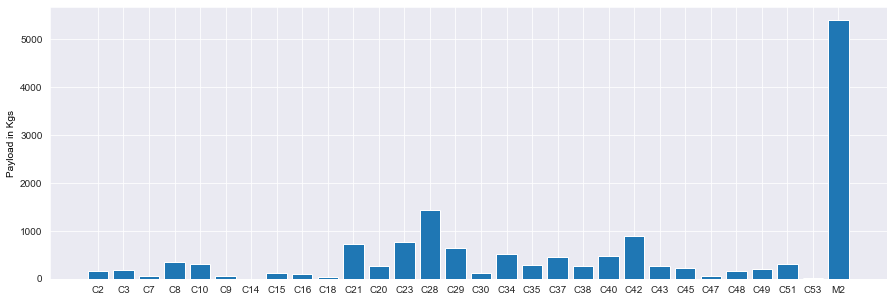

In [487]:
#year wise weight carried for international payload in each individual commercial launch
plt.figure(figsize=(15,5))
z1=i1.groupby(["year","Launch_No"])["Mass_Kg"].sum().reset_index()
plt.bar(z1["Launch_No"],z1["Mass_Kg"]);
plt.ylabel("Payload in Kgs",c="black");


## <center>Year wise weight carried for international payload in each individual commercial launch<center>

### <center>Total satellite carried in Each Launch <center>

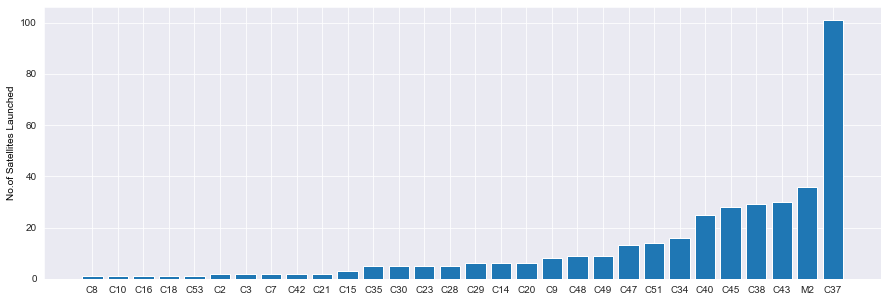

In [485]:
plt.figure(figsize=(15,5))
z2=i1.groupby(["year","Launch_No"])["Tot_Sats"].sum().sort_values(ascending=True).reset_index()
plt.bar(z2["Launch_No"],z2["Tot_Sats"]);
plt.ylabel("No.of Satellites Launched",c="black");

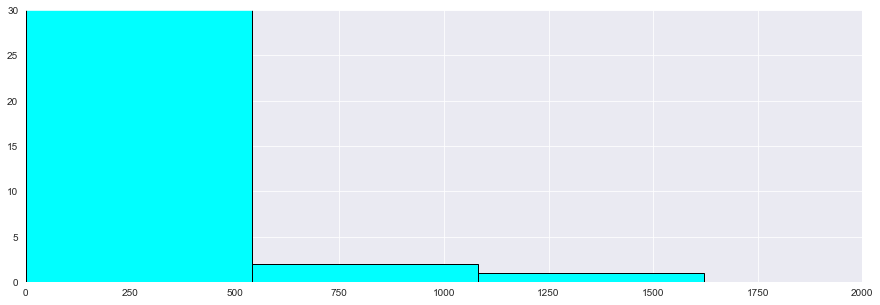

In [504]:
plt.figure(figsize=(15,5))
plt.hist(i1["Mass_Kg"],bins=10,ec="black",color="aqua")
plt.ylim(0,30)
plt.xlim(0,2000)
plt.xticks();


### <center> Year Wise , Country Wise and Launch Vehicle wise tabular data of Total satellites and total mass carried <center>

In [471]:

i1.groupby(["year","Launch Vehicle","Launch_No","Country"])[["Tot_Sats","Mass_Kg"]].sum()


Tot_Sats  Mass_Kg
year Launch Vehicle Launch_No Country                             
1999 PSLV           C2        GERMANY                   1    45.00
                              REPUBLIC OF KOREA         1   110.00
2001 PSLV           C3        BELGIUM                   1    94.00
                              GERMANY                   1    92.00
2007 PSLV           C7        ARGENTINA                 1     6.00
                              INDONESIA                 1    56.00
                    C8        ITALY                     1   350.00
2008 PSLV           C10       ISRAEL                    1   300.00
                    C9        CANADA                    2    23.00
                              DENMARK                   1     3.00
                              GERMANY                   2    11.00
                              JAPAN                     2     8.00
                              THE NETHERLANDS           1     6.50
2009 PSLV           C14       GERMANY                   4     4.00
                              SWITZERLAND               1     1.00
                              TURKEY                    1     1.00
2010 PSLV           C15       ALGERIA                   1   116.00
                              NORWAY                    1     6.50
                              SWITZERLAND               1     1.00
2011 PSLV           C16       SINGAPORE                 1   106.00
                    C18       LUXEMBOURG                1    28.70
2012 PSLV           C21       FRANCE                    1   712.00
                              JAPAN                     1    15.00
2013 PSLV           C20       AUSTRIA                   2    28.00
                              CANADA                    2   222.00
                              DENMARK                   1     3.00
                              UK                        1     6.50
2014 PSLV           C23       CANADA                    2    30.00
                              FRANCE                    1   714.00
                              GERMANY                   1    14.00
                              SINGAPORE                 1     7.00
2015 PSLV           C28       UK                        5  1439.00
                    C29       SINGAPORE                 6   634.40
                    C30       CANADA                    1    14.00
                              INDONESIA                 1    76.00
                              USA                       3    28.00
2016 PSLV           C34       CANADA                    2   110.50
                              GERMANY                   1   130.00
                              INDONESIA                 1   120.00
                              USA                      12   161.70
                    C35       ALGERIA                   3   227.00
                              CANADA                    1     8.00
                              USA                       1    44.00
2017 PSLV           C37       ISRAEL                    1     4.30
                              KAZAKHSTAN                1     1.70
                              SWITZERLAND               1     4.20
                              THE NETHERLANDS           1     3.00
                              UAE                       1     1.10
                              USA                      96   450.40
                    C38       AUSTRIA                   1    12.15
                              BELGIUM                   3    36.45
                              CHILE                     1    12.15
                              CZECH REPUBLIC            1    12.15
                              FINLAND                   1    12.15
                              FRANCE                    1    12.15
                              GERMANY                   1    12.15
                              ITALY                     3    36.45
                              JAPAN                     1    12.15
                             

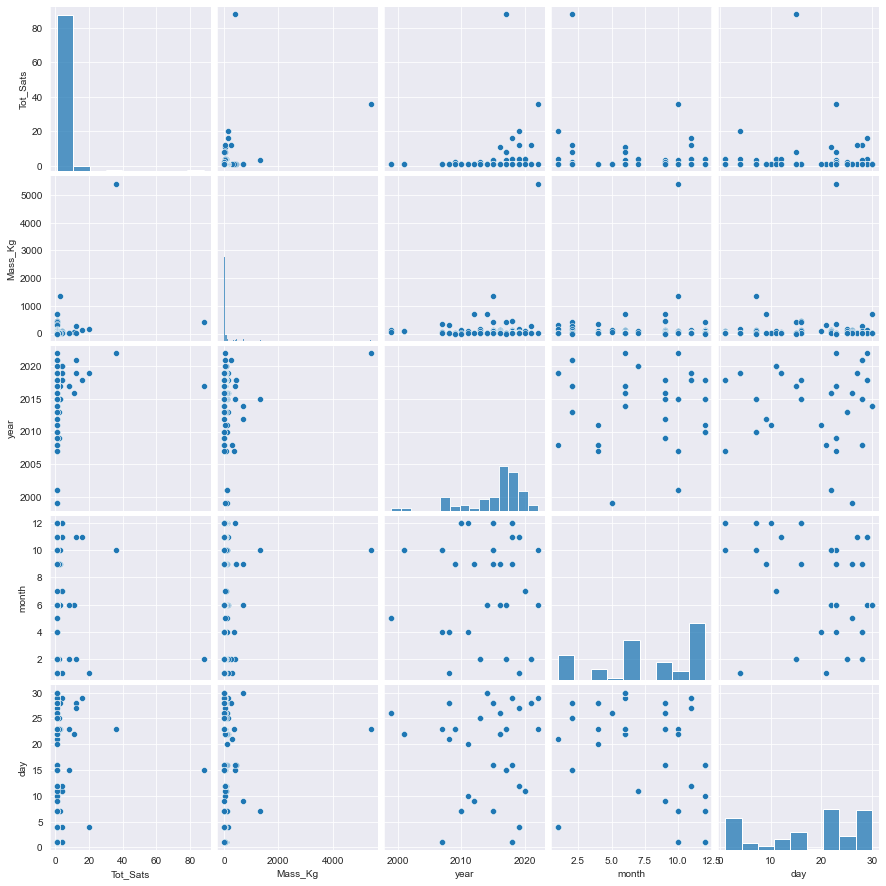

In [472]:
sns.pairplot(i1)

# <center> Part-2 : Analysis of All launches based on Application and Orbit <Center>

In [473]:
i2 = pd.read_csv("D:/DOWNLOADS/desi_sat.csv")
i2["Application"].value_counts().sort_values(ascending=True)

Climate & Environment                                 1
Space Science                                         1
Student Satellite                                     1
Communication, Experimental                           1
Climate & Environment, Disaster Management System     2
Disaster Management System, Earth Observation         3
Planetary Observation                                 3
Communication, Navigation                             3
Climate & Environment, Earth Observation              3
Climate & Environment, Communication                  3
Earth Observation, Experimental                       3
Not Specified                                         4
Navigation                                            9
Experimental                                         11
Earth Observation                                    30
Communication                                        38
Name: Application, dtype: int64

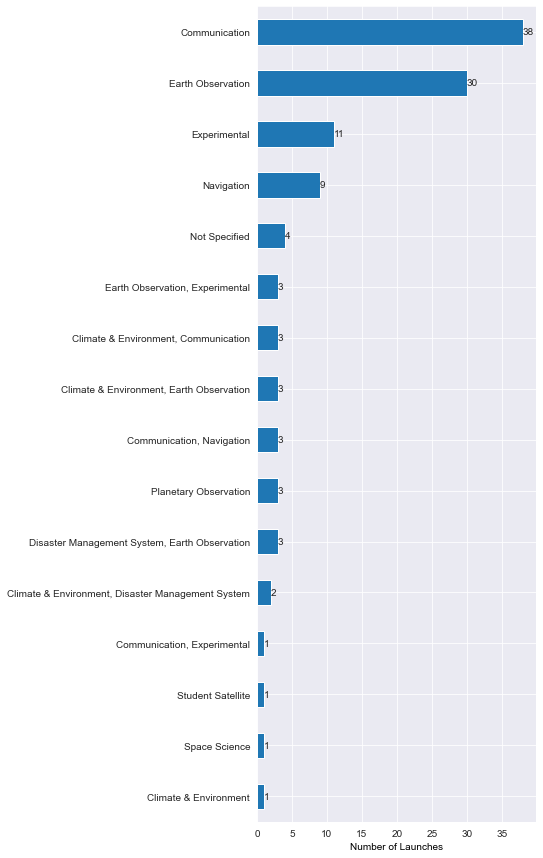

In [474]:
plt.figure(figsize=(5,15))
mn=i2["Application"].value_counts().sort_values(ascending=True)
mn.plot(kind="barh")
plt.xlabel("Number of Launches",c="black");

for i in range(0,len(mn)):
    plt.text(mn[i],i,mn[i],ha="left",va="center")
    



In [475]:
i2.head(2)

,Name,Date,Launch Vehicle,Orbit Type,Application
0,EOS-02,07-Aug-22,SSLV-D1/EOS-02 Mission,Not Specified,Earth Observation
1,GSAT-24,23-Jun-22,<!-- Ariane-V(VS257) --> Ariane-V(VS257),GSO (Geosynchronous Orbit),Communication


In [476]:
i2["Orbit Type"].value_counts()

GSO (Geosynchronous Orbit)             42
SSPO (Sun Synchronous Polar Orbit)     37
Not Specified                          14
LEO (Low Earth Orbit)                   8
GTO (Geosynchronous Transfer Orbit)     6
GEO                                     6
Lunar                                   2
Martian                                 1
Name: Orbit Type, dtype: int64

In [477]:
i2.groupby(["Orbit Type","Application"])["Launch Vehicle"].count()

Orbit Type                           Application                                      
GEO                                  Communication, Navigation                             3
                                     Navigation                                            3
GSO (Geosynchronous Orbit)           Climate & Environment, Communication                  3
                                     Climate & Environment, Disaster Management System     2
                                     Communication                                        31
                                     Communication, Experimental                           1
                                     Navigation                                            5
GTO (Geosynchronous Transfer Orbit)  Communication                                         5
                                     Earth Observation                                     1
LEO (Low Earth Orbit)                Disaster Management System, Earth Obser

# <center>Number of Launches for Each Orbit Type<center>

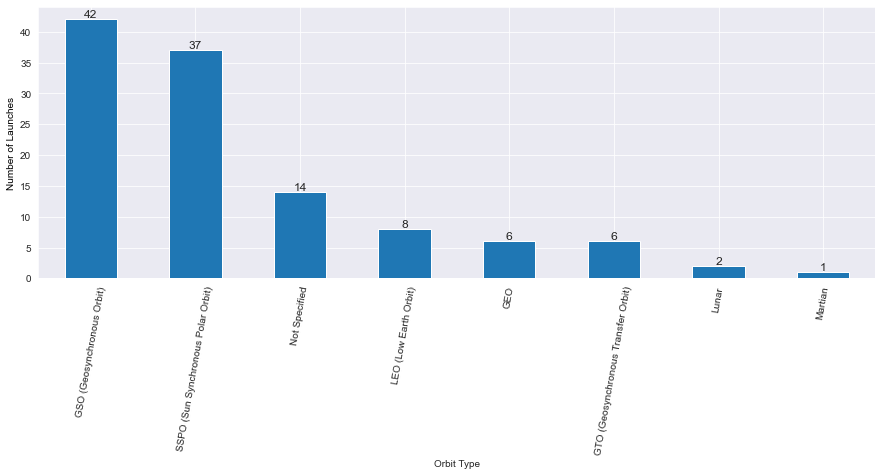

In [478]:
plt.figure(figsize=(15,5))
y21=i2.groupby(["Orbit Type"])["Launch Vehicle"].count().sort_values(ascending=False)
y21.plot(kind="bar");
plt.xticks(rotation=80);
plt.ylabel("Number of Launches",c="black")

for i in range(0,len(y21)):
    plt.text(i,y21[i],y21[i],ha="center",va="bottom",size=12)


In [479]:
#Segregating the Date Column in Day, Month and Year

i2['year'] = pd.DatetimeIndex(i2['Date']).year
i2['month'] = pd.DatetimeIndex(i2['Date']).month
i2['day'] = pd.DatetimeIndex(i2['Date']).day


# <center> Year by Year Launch into Each type of Orbit <center>

In [480]:
i2.groupby(["Orbit Type"])["year"].value_counts()

Orbit Type                           year
GEO                                  2016    2
                                     2011    1
                                     2012    1
                                     2014    1
                                     2015    1
GSO (Geosynchronous Orbit)           2003    3
                                     2013    3
                                     2014    3
                                     2016    3
                                     2002    2
                                     2007    2
                                     2010    2
                                     2017    2
                                     2018    2
                                     2020    2
                                     1981    1
                                     1982    1
                                     1983    1
                                     1988    1
                                     1990    1
                  

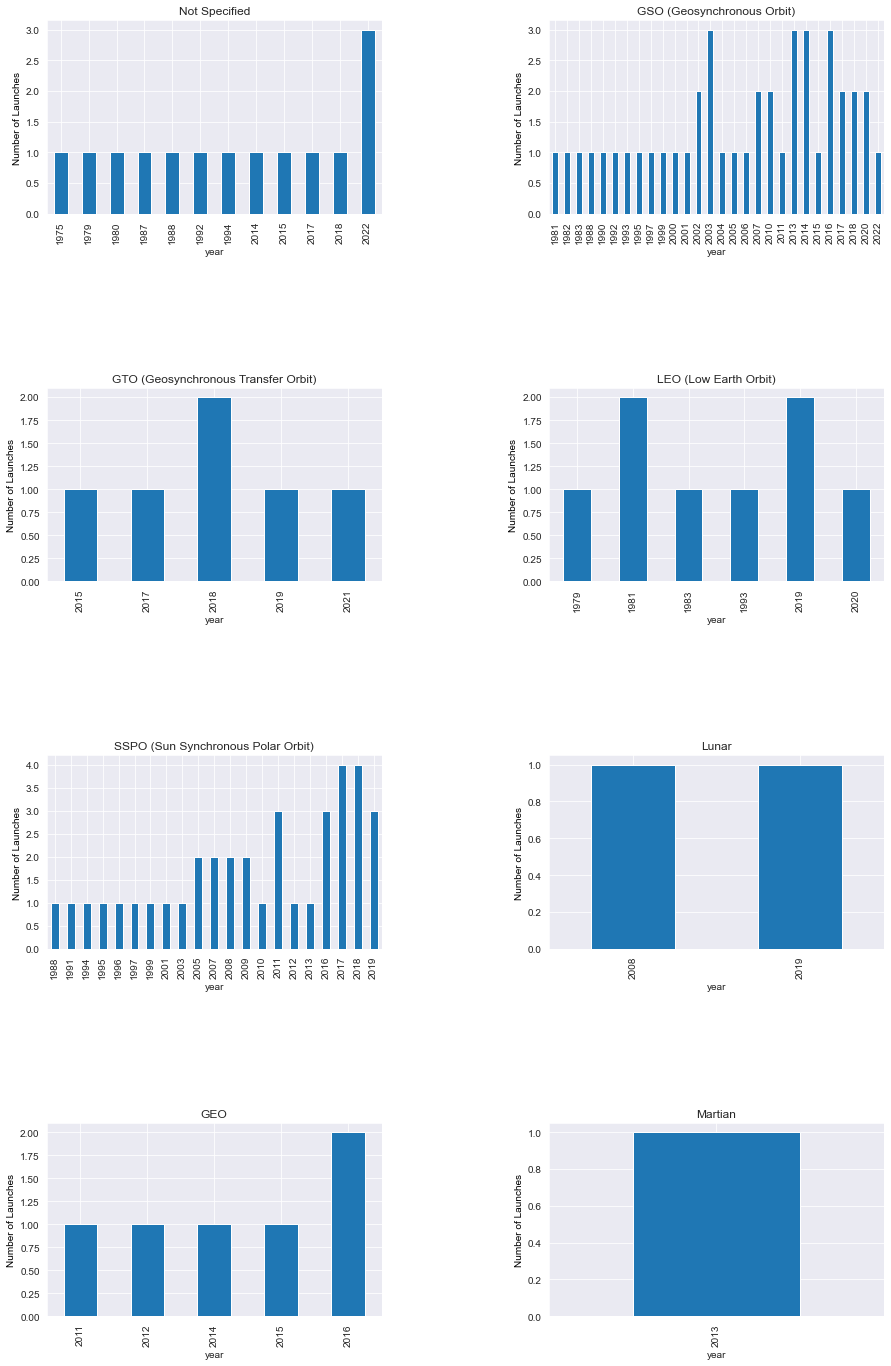

In [481]:
orbit = i2["Orbit Type"].unique()

plt.figure(figsize=(15,15))
for i in range(0,len(orbit)):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(top = 1.2, bottom=0, hspace=0.9, wspace=0.5)
    mnm=i2[i2["Orbit Type"]==orbit[i]]
    mnm.groupby("year")["Launch Vehicle"].count().plot(kind="bar")
    plt.title(orbit[i])
    plt.ylabel("Number of Launches",c="black")

# <center> Year Wise satellite launch by Application <center>

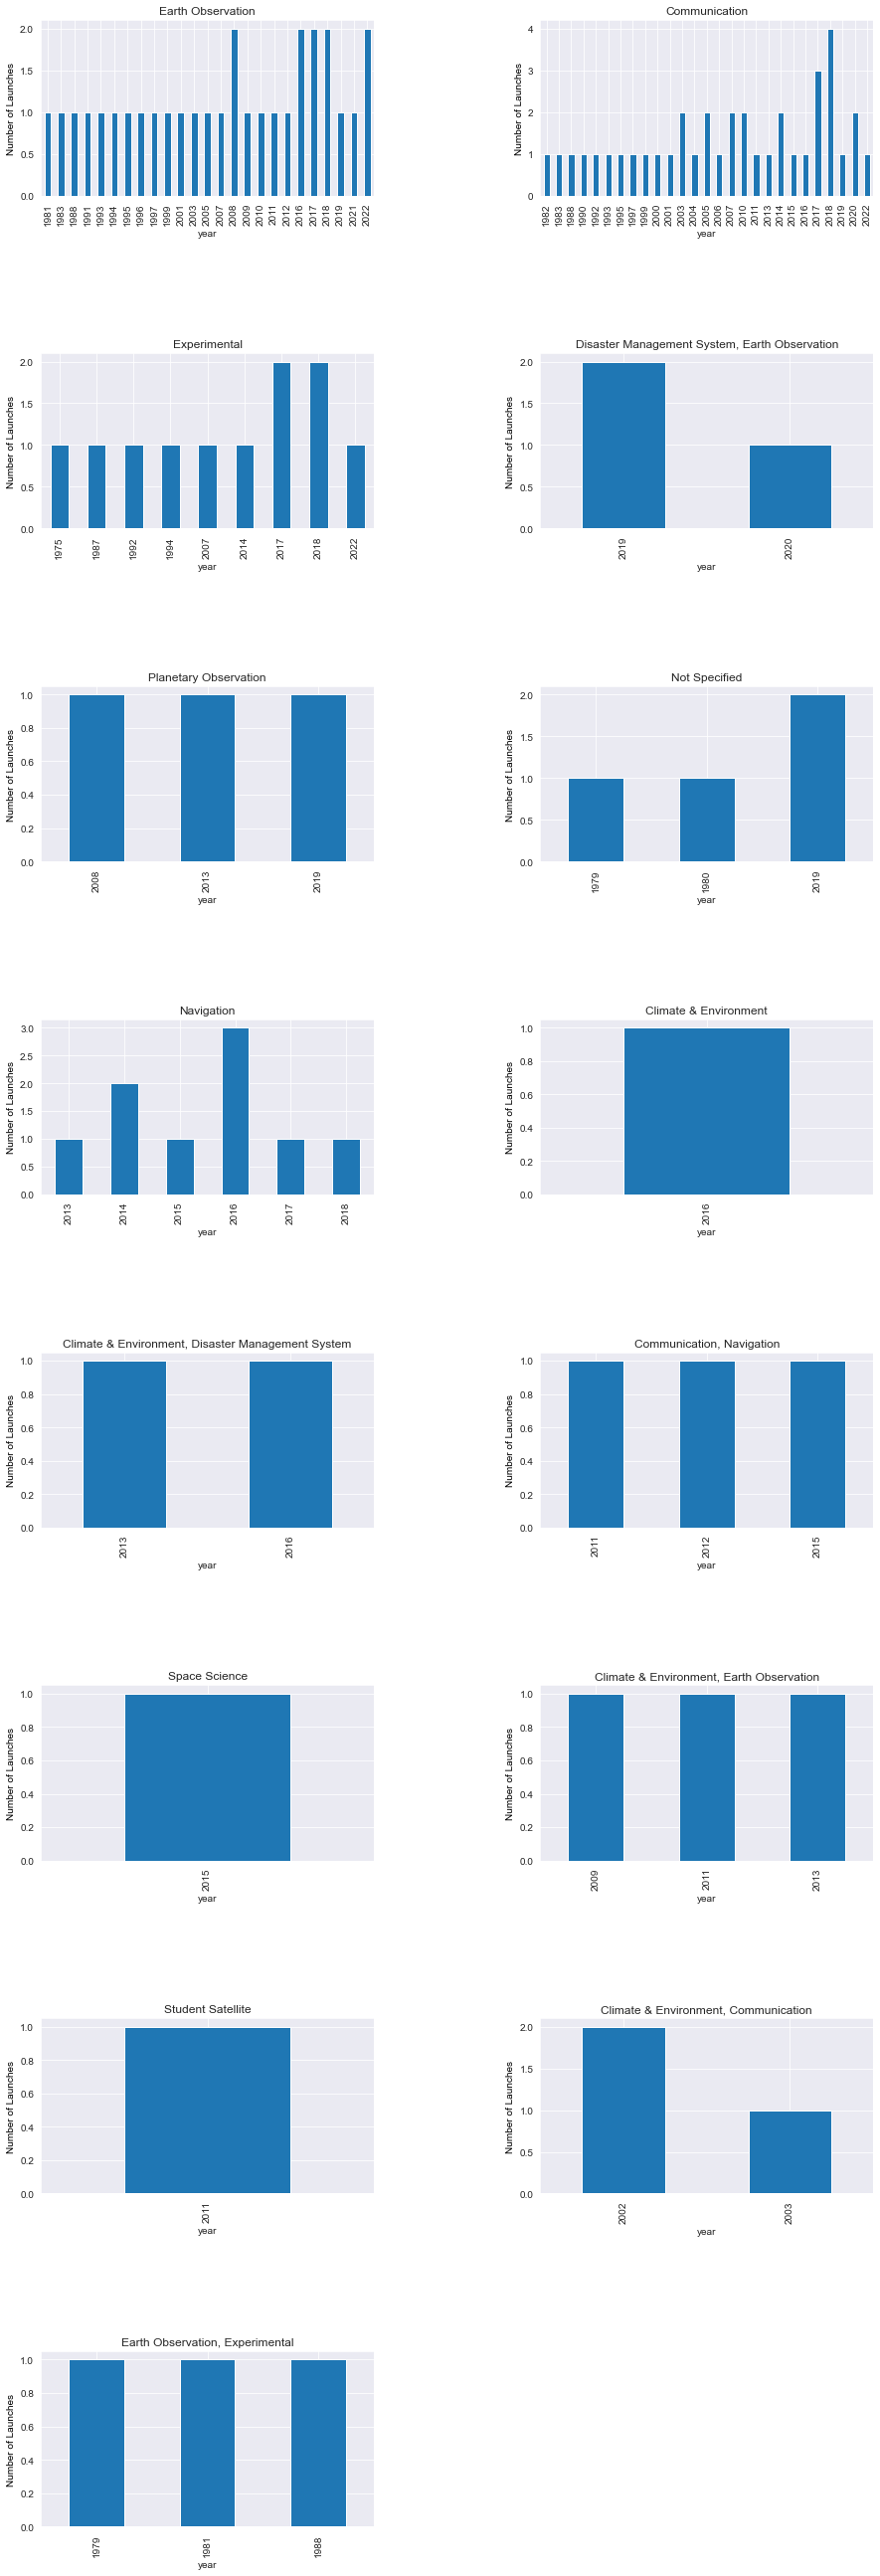

In [482]:
appli = i2["Application"].unique()


plt.figure(figsize=(15,50))
for i in range(0,15):
    plt.subplot(8,2,i+1) 
    plt.subplots_adjust(top = 1.2, bottom=0.5, hspace=0.9, wspace=0.5)
    y=i2[i2["Application"]==appli[i]]
    y.groupby("year")["Name"].count().plot(kind="bar")
    plt.title(appli[i])
    plt.ylabel("Number of Launches",c="black")
    
    

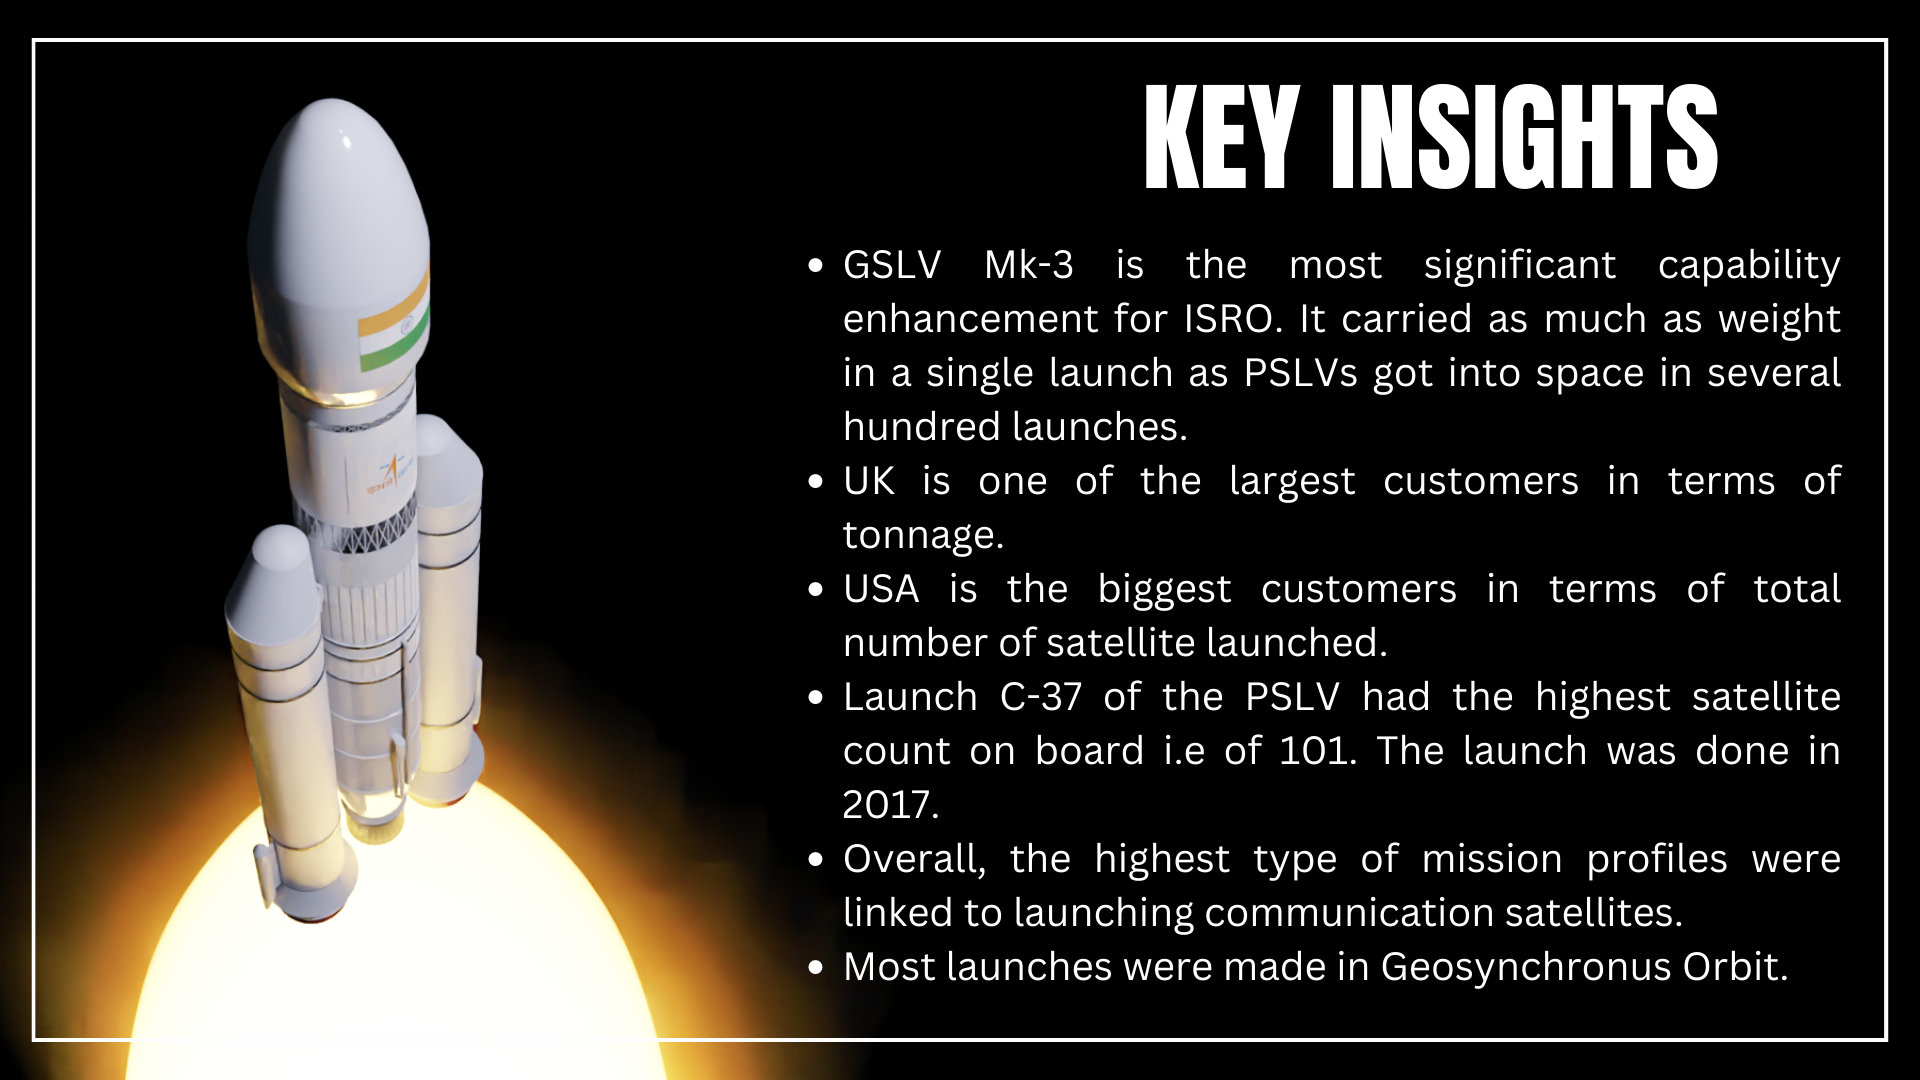

In [497]:
pip install notebook-as-pdf

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

